In [1]:
import pandas as pd
from sqlalchemy import create_engine
import os
from dotenv import load_dotenv
import warnings 
warnings.filterwarnings('ignore')

In [2]:
load_dotenv()
user            = os.environ['usr']
password        = os.environ['pas']
host            = os.environ['hos']
port            = os.environ['por']
datawarehouse   = os.environ['dwh']
datascience     = os.environ['ds']

# Connect to Database

mydb = create_engine("mysql+pymysql://{usr}:{pasx}@{hosx}:{port}/{namadb}".format(
                            usr=user, pasx=password, hosx=host, port=port, namadb=datascience))



In [3]:
df = pd.read_sql("select * from movie_data2", mydb)
df.head()

,movie_id,movie_name,genre,release_year,language,keyword,collection,company,overview,movie_poster_path,runtime,budget,revenue,popularity,vote_average,vote_count
0,2,Ariel,"Drama,Crime,Comedy",1988,Finland,"underdog,prison,factory worker,prisoner,helsin...",,Villealfa Filmproductions,Taisto Kasurinen is a Finnish coal miner whose...,/ojDg0PGvs6R9xYFodRct2kdI6wC.jpg,73,0,0,10.726,6.8,113
1,3,Shadows in Paradise,"Drama,Comedy",1986,Finland,"salesclerk,helsinki, finland,garbage",,Villealfa Filmproductions,"An episode in the life of Nikander, a garbage ...",/nj01hspawPof0mJmlgfjuLyJuRN.jpg,72,0,0,9.215,7.3,118
2,5,Four Rooms,"Crime,Comedy",1995,,"hotel,new year's eve,witch,bet,hotel room,sper...",,"Miramax,A Band Apart",It's Ted the Bellhop's first night on the job....,/uZSmxBLIuZ8gpadjAWNdA5aQDAc.jpg,98,4000000,4257354,16.877,5.8,1753
3,6,Judgment Night,"Action,Thriller,Crime",1993,,"chicago, illinois,drug dealer,escape,one night...",,"Universal Pictures,Largo Entertainment,JVC","While racing to a boxing match, Frank, Mike, J...",/rYFAvSPlQUCebayLcxyK79yvtvV.jpg,110,21000000,12136938,9.514,6.5,163
4,9,Sunday in August,Drama,2004,Germany,"sailboat,dying and death",,,,,15,0,0,2.251,6.9,7


In [4]:
# Get a dataframe with as many columns as there are genres
genre = df.genre.str.get_dummies(sep = ",")
genre

,,Action,Adventure,Animation,Comedy,Crime,Documentary,Drama,Family,Fantasy,History,Horror,Music,Mystery,Romance,Science Fiction,TV Movie,Thriller,War,Western
0,0,0,0,0,1,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0
4,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
159721,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
159722,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
159723,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
159724,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [5]:
new_df = pd.concat([df, genre], axis=1, join='inner')
new_df.head()

,movie_id,movie_name,genre,release_year,language,keyword,collection,company,overview,movie_poster_path,...,History,Horror,Music,Mystery,Romance,Science Fiction,TV Movie,Thriller,War,Western
0,2,Ariel,"Drama,Crime,Comedy",1988,Finland,"underdog,prison,factory worker,prisoner,helsin...",,Villealfa Filmproductions,Taisto Kasurinen is a Finnish coal miner whose...,/ojDg0PGvs6R9xYFodRct2kdI6wC.jpg,...,0,0,0,0,0,0,0,0,0,0
1,3,Shadows in Paradise,"Drama,Comedy",1986,Finland,"salesclerk,helsinki, finland,garbage",,Villealfa Filmproductions,"An episode in the life of Nikander, a garbage ...",/nj01hspawPof0mJmlgfjuLyJuRN.jpg,...,0,0,0,0,0,0,0,0,0,0
2,5,Four Rooms,"Crime,Comedy",1995,,"hotel,new year's eve,witch,bet,hotel room,sper...",,"Miramax,A Band Apart",It's Ted the Bellhop's first night on the job....,/uZSmxBLIuZ8gpadjAWNdA5aQDAc.jpg,...,0,0,0,0,0,0,0,0,0,0
3,6,Judgment Night,"Action,Thriller,Crime",1993,,"chicago, illinois,drug dealer,escape,one night...",,"Universal Pictures,Largo Entertainment,JVC","While racing to a boxing match, Frank, Mike, J...",/rYFAvSPlQUCebayLcxyK79yvtvV.jpg,...,0,0,0,0,0,0,0,1,0,0
4,9,Sunday in August,Drama,2004,Germany,"sailboat,dying and death",,,,,...,0,0,0,0,0,0,0,0,0,0


In [29]:
movie = new_df.copy()
movie.head()

,movie_id,movie_name,genre,release_year,language,keyword,collection,company,overview,movie_poster_path,...,History,Horror,Music,Mystery,Romance,Science Fiction,TV Movie,Thriller,War,Western
0,2,Ariel,"Drama,Crime,Comedy",1988,Finland,"underdog,prison,factory worker,prisoner,helsin...",,Villealfa Filmproductions,Taisto Kasurinen is a Finnish coal miner whose...,/ojDg0PGvs6R9xYFodRct2kdI6wC.jpg,...,0,0,0,0,0,0,0,0,0,0
1,3,Shadows in Paradise,"Drama,Comedy",1986,Finland,"salesclerk,helsinki, finland,garbage",,Villealfa Filmproductions,"An episode in the life of Nikander, a garbage ...",/nj01hspawPof0mJmlgfjuLyJuRN.jpg,...,0,0,0,0,0,0,0,0,0,0
2,5,Four Rooms,"Crime,Comedy",1995,,"hotel,new year's eve,witch,bet,hotel room,sper...",,"Miramax,A Band Apart",It's Ted the Bellhop's first night on the job....,/uZSmxBLIuZ8gpadjAWNdA5aQDAc.jpg,...,0,0,0,0,0,0,0,0,0,0
3,6,Judgment Night,"Action,Thriller,Crime",1993,,"chicago, illinois,drug dealer,escape,one night...",,"Universal Pictures,Largo Entertainment,JVC","While racing to a boxing match, Frank, Mike, J...",/rYFAvSPlQUCebayLcxyK79yvtvV.jpg,...,0,0,0,0,0,0,0,1,0,0
4,9,Sunday in August,Drama,2004,Germany,"sailboat,dying and death",,,,,...,0,0,0,0,0,0,0,0,0,0


In [7]:
movie2 = new_df.copy()
movie2.head()

,movie_id,movie_name,genre,release_year,language,keyword,collection,company,overview,movie_poster_path,...,History,Horror,Music,Mystery,Romance,Science Fiction,TV Movie,Thriller,War,Western
0,2,Ariel,"Drama,Crime,Comedy",1988,Finland,"underdog,prison,factory worker,prisoner,helsin...",,Villealfa Filmproductions,Taisto Kasurinen is a Finnish coal miner whose...,/ojDg0PGvs6R9xYFodRct2kdI6wC.jpg,...,0,0,0,0,0,0,0,0,0,0
1,3,Shadows in Paradise,"Drama,Comedy",1986,Finland,"salesclerk,helsinki, finland,garbage",,Villealfa Filmproductions,"An episode in the life of Nikander, a garbage ...",/nj01hspawPof0mJmlgfjuLyJuRN.jpg,...,0,0,0,0,0,0,0,0,0,0
2,5,Four Rooms,"Crime,Comedy",1995,,"hotel,new year's eve,witch,bet,hotel room,sper...",,"Miramax,A Band Apart",It's Ted the Bellhop's first night on the job....,/uZSmxBLIuZ8gpadjAWNdA5aQDAc.jpg,...,0,0,0,0,0,0,0,0,0,0
3,6,Judgment Night,"Action,Thriller,Crime",1993,,"chicago, illinois,drug dealer,escape,one night...",,"Universal Pictures,Largo Entertainment,JVC","While racing to a boxing match, Frank, Mike, J...",/rYFAvSPlQUCebayLcxyK79yvtvV.jpg,...,0,0,0,0,0,0,0,1,0,0
4,9,Sunday in August,Drama,2004,Germany,"sailboat,dying and death",,,,,...,0,0,0,0,0,0,0,0,0,0


In [8]:
movie.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 159726 entries, 0 to 159725
Data columns (total 36 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   movie_id           159726 non-null  int64  
 1   movie_name         159726 non-null  object 
 2   genre              159726 non-null  object 
 3   release_year       159726 non-null  int64  
 4   language           159726 non-null  object 
 5   keyword            159726 non-null  object 
 6   collection         159726 non-null  object 
 7   company            159726 non-null  object 
 8   overview           159726 non-null  object 
 9   movie_poster_path  159726 non-null  object 
 10  runtime            159726 non-null  int64  
 11  budget             159726 non-null  int64  
 12  revenue            159726 non-null  int64  
 13  popularity         159726 non-null  float64
 14  vote_average       159726 non-null  float64
 15  vote_count         159726 non-null  int64  
 16    

# Filtering

In [9]:
genre = ['Drama', 'Crime']

In [10]:
recommendation = movie[movie[genre].all(axis=1)]
recommendation.head()

,movie_id,movie_name,genre,release_year,language,keyword,collection,company,overview,movie_poster_path,...,History,Horror,Music,Mystery,Romance,Science Fiction,TV Movie,Thriller,War,Western
0,2,Ariel,"Drama,Crime,Comedy",1988,Finland,"underdog,prison,factory worker,prisoner,helsin...",,Villealfa Filmproductions,Taisto Kasurinen is a Finnish coal miner whose...,/ojDg0PGvs6R9xYFodRct2kdI6wC.jpg,...,0,0,0,0,0,0,0,0,0,0
10,16,Dancer in the Dark,"Drama,Crime",2000,,"individual,dancing,robbery,factory worker,secr...",,"Constantin Film,France 3 Cinéma,Zentropa Enter...","Selma, a Czech immigrant on the verge of blind...",/9rsivF4sWfmBzrNr4LPu6TNJhXX.jpg,...,0,0,0,0,0,0,0,0,0,0
28,59,A History of Violence,"Drama,Thriller,Crime",2005,,"robbery,double life,dual identity,small town,i...",,"DC Comics,New Line Cinema,BenderSpink",An average family is thrust into the spotlight...,/rrc6GiAKHDrUjp8OmdVng9hRWBn.jpg,...,0,0,0,0,0,0,0,1,0,0
33,66,Absolute Power,"Crime,Drama,Action",1997,,"corruption,assassination,washington d.c.,rape,...",,"Columbia Pictures,Malpaso Productions,Castle R...",A master thief coincidentally is robbing a hou...,/xX9gmwtnTi0Y8WcTF7Jsg9Hdp6W.jpg,...,0,0,0,0,0,0,0,0,0,0
34,67,Paradise Now,"Thriller,Crime,Drama",2005,,"individual,civil war,israel,palestine,middle e...",,"ARTE France Cinéma,Medienboard Berlin-Brandenb...",Two childhood friends are recruited for a suic...,/qWZkYa8VdcDZk8uzRB2PfhpM9IL.jpg,...,0,0,0,0,0,0,0,1,0,0


# IMDB weighted rating

Movie dengan rating 10 namun hanya 1 vote count tidak lebih baik dari movie dengan rating 8 tapi dengan vote count 100, maka dari itu diperlukan perhitungan yang tepat untuk menghitung bobot dari movie tersebut untuk direkomendasikan dan diurutkan menurut score tertinggi ke rendah.

<AxesSubplot: >

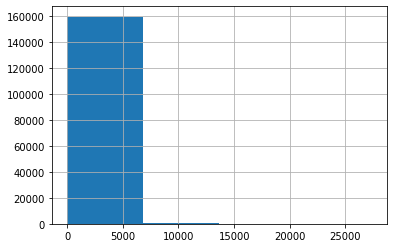

In [11]:
movie.vote_count.hist(bins=4)

In [12]:
movie.vote_count.min()

0

In [13]:
movie.vote_count.max()

27342

In [14]:
movie.vote_count.min()

0

In [15]:
# menghitung minimum vote count

m = movie.vote_count.quantile(0.95)
m

191.0

In [16]:
# menghitung rata rata rating dari semua film

C = (movie.vote_average * movie.vote_count).sum() / movie.vote_count.sum()
C

6.842142256755922

In [17]:
def imdb_score(data, q=0.95):
    m = data.vote_count.quantile(q)
    C = (data.vote_average * data.vote_count).sum() / data.vote_count.sum()

    data = data[data.vote_count >= m]
    data["score"] = data.apply(lambda x: (x.vote_average * x.vote_count + C*m) / (x.vote_count + m), axis=1)
    return data

In [30]:
recommend = imdb_score(recommendation)
recommend.head()

,movie_name,genre,runtime,vote_average,vote_count,score
227,The Shawshank Redemption,"Drama,Crime",142,8.7,17301,8.303094
189,The Godfather,"Drama,Crime",175,8.7,13093,8.222696
191,The Godfather: Part II,"Drama,Crime",202,8.6,7762,8.007663
115,The Dark Knight,"Drama,Action,Crime,Thriller",152,8.5,23458,8.230906
382,The Green Mile,"Fantasy,Drama,Crime",189,8.5,11063,8.052958


In [31]:
recommendation = recommend.loc[:, ['movie_name', 'genre' ,'runtime', 'vote_average', 'vote_count', 'score']]
recommendation = recommendation.sort_values("score", ascending=False)
recommendation

,movie_name,genre,runtime,vote_average,vote_count,score
227,The Shawshank Redemption,"Drama,Crime",142,8.7,17301,8.303094
115,The Dark Knight,"Drama,Action,Crime,Thriller",152,8.5,23458,8.230906
189,The Godfather,"Drama,Crime",175,8.7,13093,8.222696
382,The Green Mile,"Fantasy,Drama,Crime",189,8.5,11063,8.052958
191,The Godfather: Part II,"Drama,Crime",202,8.6,7762,8.007663
126956,Joker,"Crime,Thriller,Drama,Crime,Thriller,Drama",122,8.2,15272,7.935325
223,The Silence of the Lambs,"Crime,Drama,Thriller,Horror",119,8.3,10965,7.932995
602,GoodFellas,"Drama,Crime",145,8.4,8013,7.915020
66,Léon: The Professional,"Crime,Drama,Action",111,8.3,9982,7.912570
936,The Departed,"Drama,Thriller,Crime",151,8.2,10245,7.861102


# Membuat Class Recommendasi berdasarkan filter dan scoring yang telah dilakukan sebelumnya

In [39]:
class RecommenderSystem:
    def __init__(self, data):
        self.df = pd.DataFrame(data)

    def recommend(self, genre=None, top=10):
        df = self.df.copy()
        df = self.demographic_filter(df, genre=genre)
        df = self.imdb_score(df)

        recommend = df.loc[:, ['movie_name', 'genre' ,'runtime', 'vote_average', 'vote_count', 'score']]
        recommend = recommend.sort_values("score", ascending=False)
        recommend = recommend.head(top)
        return recommend

    @staticmethod
    def demographic_filter(df, genre=None):
        df = df.copy()
        if genre is not None:
            df = df[df[genre].all(axis=1)]
        return df
        
    @staticmethod
    def imdb_score(df, q=0.95):
        df = df.copy()
        m = df.vote_count.quantile(q)
        C = (df.vote_average * df.vote_count).sum() / df.vote_count.sum()

        df = df[df.vote_count >= m]
        df["score"] = df.apply(lambda x: (x.vote_average * x.vote_count + C*m) / (x.vote_count + m), axis=1)
        return df


In [22]:
movie2.head()

,movie_id,movie_name,genre,release_year,language,keyword,collection,company,overview,movie_poster_path,...,History,Horror,Music,Mystery,Romance,Science Fiction,TV Movie,Thriller,War,Western
0,2,Ariel,"Drama,Crime,Comedy",1988,Finland,"underdog,prison,factory worker,prisoner,helsin...",,Villealfa Filmproductions,Taisto Kasurinen is a Finnish coal miner whose...,/ojDg0PGvs6R9xYFodRct2kdI6wC.jpg,...,0,0,0,0,0,0,0,0,0,0
1,3,Shadows in Paradise,"Drama,Comedy",1986,Finland,"salesclerk,helsinki, finland,garbage",,Villealfa Filmproductions,"An episode in the life of Nikander, a garbage ...",/nj01hspawPof0mJmlgfjuLyJuRN.jpg,...,0,0,0,0,0,0,0,0,0,0
2,5,Four Rooms,"Crime,Comedy",1995,,"hotel,new year's eve,witch,bet,hotel room,sper...",,"Miramax,A Band Apart",It's Ted the Bellhop's first night on the job....,/uZSmxBLIuZ8gpadjAWNdA5aQDAc.jpg,...,0,0,0,0,0,0,0,0,0,0
3,6,Judgment Night,"Action,Thriller,Crime",1993,,"chicago, illinois,drug dealer,escape,one night...",,"Universal Pictures,Largo Entertainment,JVC","While racing to a boxing match, Frank, Mike, J...",/rYFAvSPlQUCebayLcxyK79yvtvV.jpg,...,0,0,0,0,0,0,0,1,0,0
4,9,Sunday in August,Drama,2004,Germany,"sailboat,dying and death",,,,,...,0,0,0,0,0,0,0,0,0,0


In [40]:
recsys = RecommenderSystem(data=movie2)

In [34]:
genre2 = ['Comedy', 'Action']

In [43]:
rec = recsys.recommend(genre=genre2)

In [44]:
rec

,movie_name,genre,runtime,vote_average,vote_count,score
95465,Spider-Man: Into the Spider-Verse,"Action,Adventure,Animation,Science Fiction,Comedy",117,8.4,8100,8.139379
61354,Big Hero 6,"Adventure,Family,Animation,Action,Comedy",102,7.8,12134,7.678453
5270,The Iron Giant,"Animation,Family,Adventure,Action,Science Fict...",86,7.9,3702,7.549633
88182,Deadpool,"Action,Adventure,Comedy",108,7.6,23690,7.545490
38683,How to Train Your Dragon 2,"Fantasy,Action,Adventure,Animation,Comedy,Family",102,7.7,6956,7.519511
84530,Guardians of the Galaxy Vol. 2,"Action,Adventure,Comedy,Science Fiction",137,7.6,15518,7.519129
84545,Thor: Ragnarok,"Action,Adventure,Comedy,Fantasy",131,7.6,14722,7.515131
67075,Kingsman: The Secret Service,"Crime,Comedy,Action,Adventure",129,7.6,12277,7.499937
109055,Deadpool 2,"Action,Comedy,Adventure",119,7.5,12198,7.409520
402,The Blues Brothers,"Music,Comedy,Action,Crime",133,7.7,2723,7.333312


In [45]:
for j in range(len(rec)):
    print(rec.iloc[j,0])

Spider-Man: Into the Spider-Verse
Big Hero 6
The Iron Giant
Deadpool
How to Train Your Dragon 2
Guardians of the Galaxy Vol. 2
Thor: Ragnarok
Kingsman: The Secret Service
Deadpool 2
The Blues Brothers


In [28]:
import pickle

In [ ]:
pickle.dump(movie.to_dict(), open('movies-genre.pkl', 'rb'))